<a href="https://colab.research.google.com/github/kiankhorrami/co2emissions/blob/main/Kian_Khorrami_MATH_2315_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [35]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

The purpose of these codes are to import necessary Python packages that will be used in data analysis, visualization, and handling missing values.



## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

This code reads the data from the URL, storing the data into what we define as "df".

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [37]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

The purpose of this code is to identity all of the categories from the websites data that are not identified as countries. We are only looking at data collected from countries' CO2 emissions, not regions'. 

Remove the rows corresponding to the non-countries.

In [38]:
df = df.loc[df['country'].isin(non_countries) == False]

The purpose of this code is to filter out the the previously stated regions. 

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

In [39]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


This code displays the top 5 rows of the data set to get an idea for what the data looks like. The output is in year-increasing order, as well as alphabetical. The NaN values also tell us that there was no data collected for such data points. 

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

The purpose of this code is to display a summary of the DataFrame. The output shows that under the Dtype column; object, int64, and float64 are all assigned correctly to their proper category, and that there are no missing null values.

##### $\rightarrow$ What years are present in the data set?

##### Solution

In [41]:
df_population = df[['year']]
df['year'].unique()

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

This code displays the data frame of the selected categry, in this case it is the year. The output shows a list of every year that is included in the data. 

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

In [42]:
df[df['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


The purpose of this code is to identify the top 10 emitters of CO2 in the year 2020. The output shows top 10 countries with the highest CO2 emissions in the year 2020; China, United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia and South Korea. They are sorted in descending order of their CO2 emissions.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

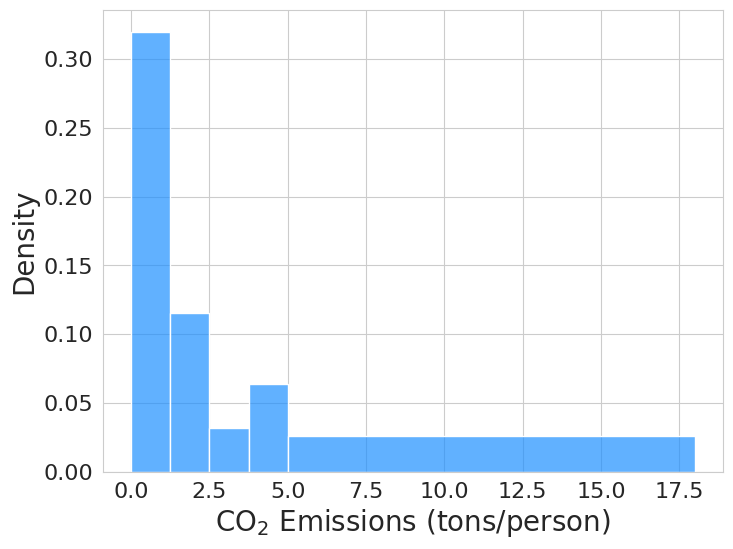

In [43]:
plt.figure(figsize = (8,6))
sns.histplot(data = df[df['year'] == 2020], x = 'co2', bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions (tons/person)',fontsize = 20)
plt.tick_params(labelsize = 16.);

The purpose of this code is to create a histogram plot of the distribution of CO2 emissions per person in the year 2020. The output shows that the data is right-skewed, having a higher density of lower CO2 emissions. 

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

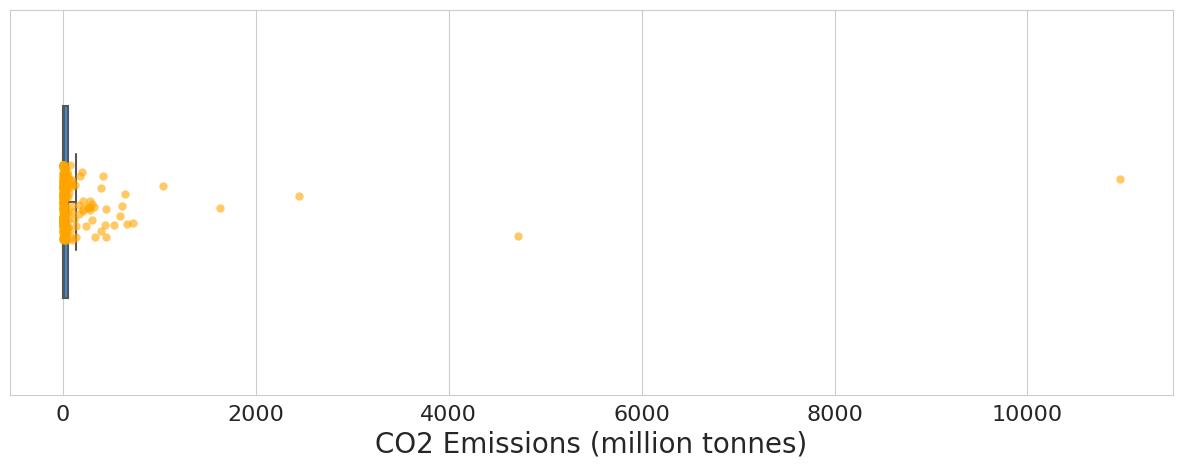

In [44]:
plt.figure(figsize = (15,5))
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)
plt.xlabel('CO2 Emissions (million tonnes)', fontsize = 20)
plt.tick_params(labelsize = 16);



The purpose of this code is to visualize CO2 emissions per country in the year 2020. The output shows that the top CO2 emitting countries are far off from the mean of the data.

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

When looking at the boxplot, all of the top 10 CO2 emitters are outliers because they are outside of the boxplot whiskers. 

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

In [45]:
df_top = df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])]
df_top[(df['year'] >= 1970) | (df['year'] <= 2020)].isna()

<ipython-input-45-32ead3c4b46b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top[(df['year'] >= 1970) | (df['year'] <= 2020)].isna()


,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8819,False,False,False,False,False,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8820,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8821,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8822,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
8823,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44219,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44220,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


The purpose of this code is to include only the rows where the country column matches one of the top 10 countries with the highest CO2 emissions, as well as check for missing values in the filtered dataframe by using the isna() method. The output shows us that the data points labeled as "True", are missing data. 

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

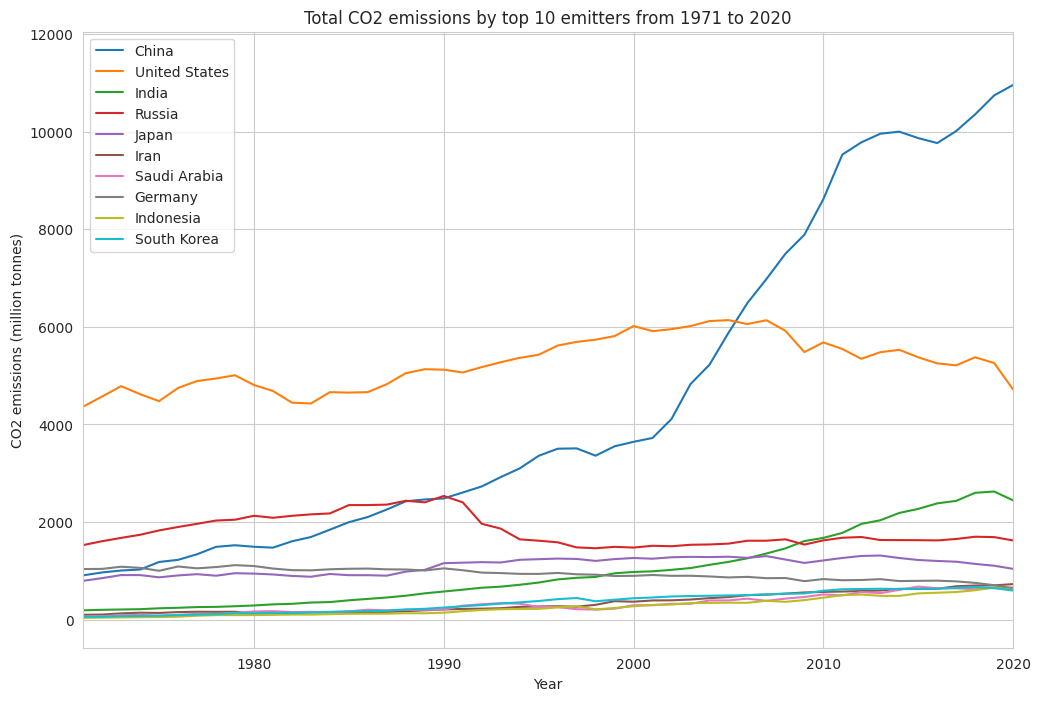

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))

top_emitters_2020 = df[df['year'] == 2020].sort_values('co2', ascending=False).head(10)

for country in top_emitters_2020['country']:
    data = df[(df['country'] == country)]
    total_emissions = data.groupby('year')['co2'].sum()
    ax.plot(total_emissions.index, total_emissions.values, label=country)

ax.set_xlabel('Year')
ax.set_ylabel('CO2 emissions (million tonnes)')
ax.set_title('Total CO2 emissions by top 10 emitters from 1971 to 2020')
ax.legend()
plt.xlim(1971,2020)
plt.show()



The purpose of this code is to show the trend of CO2 emissions over the years from 1971 to 2020 for each of the top 10 countries with the highest CO2 emissions in 2020. The output shows that China has had the most significant increase and remains as the top CO2 producer.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

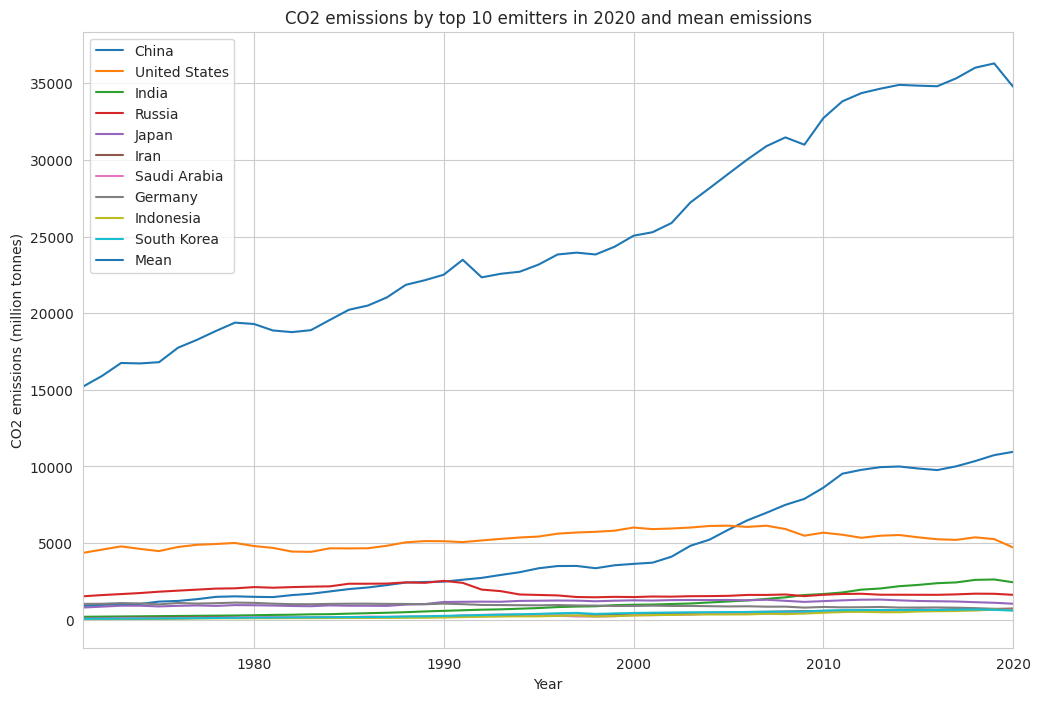

In [47]:
emissions_by_year = df.groupby('year')['co2'].sum().reset_index()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

for country in top_emitters_2020['country']:
    data = df[(df['country'] == country)]
    ax.plot(data['year'], data['co2'], label=country)

ax.plot(emissions_by_year['year'], emissions_by_year['co2'], label='Mean')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 emissions (million tonnes)')
ax.set_title('CO2 emissions by top 10 emitters in 2020 and mean emissions')
ax.legend()
plt.xlim(1971,2020)
plt.show()


This code is meant to compare the trend of CO2 emissions over the years from 1751 to 2017 for each of the top 10 countries with the highest CO2 emissions in 2020, as well as the mean emissions for all countries. The output shows us that the mean CO2 emissions from the top 10 countries has more than doubled over the last 50 years. 

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

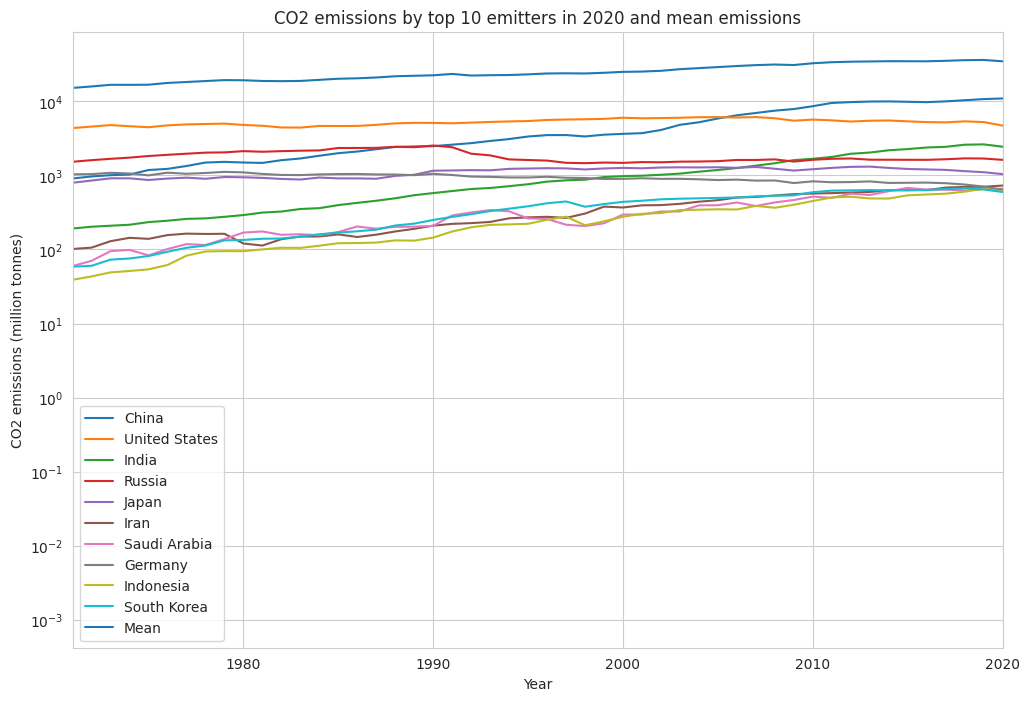

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

for country in top_emitters_2020['country']:
    data = df[(df['country'] == country)]
    ax.plot(data['year'], data['co2'], label=country)

ax.plot(emissions_by_year['year'], emissions_by_year['co2'], label='Mean')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 emissions (million tonnes)')
ax.set_title('CO2 emissions by top 10 emitters in 2020 and mean emissions')
ax.legend()
ax.set_yscale('log') # set the y-axis to a logarithmic scale
plt.xlim(1971,2020)
plt.show()


The purpose of this code is to create a plot that shows the trends of the top 10 CO2 emitting countries over the past 50 years on a larger scale, as well as their mean. The output shows us that the trends appear more similar than without using a log scale, because the difference in CO2 emissions exponentially increases. 

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

Over the last 50 years, China has overtaken the US as the highest CO2 emitting country. Along with China, India, Iran, Saudi Arabia, Indonesia and South Korea have all shown increases in their CO2 emissions. However, Japan and the USA appear to not have had an overall change in CO2 emissions. Also, Germany and Russia seemed to have had slight reductions in their overal year-by-year CO2 emissions over the course of the last 50 years. 